<a href="https://colab.research.google.com/github/Saina34/SeattleAirbnbDatanalysis/blob/main/Data_Analysis_Seattle_Airbnb_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries


In [1]:
# loading pandas
import pandas as pd
# loading numpy
import numpy as np
# importing matplotlib
import matplotlib.pyplot as plt
# importing the seaborn package
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Preprocessing of Data

In [2]:
# Reading in the data
listings=pd.read_csv('/content/listings.csv')

In [3]:
# Getting the first n rows of the dataframe
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2.0,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6.0,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2.0,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1.0,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1.0,0.89


In [4]:
# Getting the dimensions of the dataframe
listings.shape

(2352, 92)

In [5]:
# Reading in the columns of the dataframe
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
# Printing summary of the dataframe
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                2352 non-null   int64  
 1   listing_url                       2352 non-null   object 
 2   scrape_id                         2352 non-null   int64  
 3   last_scraped                      2352 non-null   object 
 4   name                              2352 non-null   object 
 5   summary                           2256 non-null   object 
 6   space                             2014 non-null   object 
 7   description                       2352 non-null   object 
 8   experiences_offered               2352 non-null   object 
 9   neighborhood_overview             1724 non-null   object 
 10  notes                             1357 non-null   object 
 11  transit                           1775 non-null   object 
 12  thumbn

In [7]:
# Getting the summary statistics for the listings dataframe
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,2.352000e+03,2.352000e+03,2.352000e+03,2349.000000,2349.000000,2351.000000,2351.000000,2351.000000,2342.000000,2347.000000,...,1970.000000,1963.000000,1966.000000,1964.000000,1967.000000,1965.000000,1964.000000,0.0,2351.000000,1982.000000
mean,5.529208e+06,2.016010e+13,1.539913e+07,8.985951,8.985951,47.618845,-122.334395,3.483199,1.274979,1.335322,...,94.396447,9.618951,9.561546,9.760183,9.792578,9.562850,9.431263,NaN,3.112718,2.130283
std,2.968998e+06,0.000000e+00,1.445364e+07,32.252059,32.252059,0.041212,0.033004,2.022542,0.586919,0.893546,...,6.843805,0.725597,0.784082,0.633601,0.609092,0.656895,0.776541,NaN,6.233783,1.885568
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.246498e+06,2.016010e+13,3.092359e+06,1.000000,1.000000,47.599049,-122.354355,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.690000
50%,6.116640e+06,2.016010e+13,9.841347e+06,1.000000,1.000000,47.614419,-122.333289,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000
75%,8.028895e+06,2.016010e+13,2.497522e+07,3.000000,3.000000,47.651908,-122.309737,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.080000
max,1.034016e+07,2.016010e+13,5.305038e+07,502.000000,502.000000,47.705141,-122.252230,16.000000,8.000000,6.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


<Axes: >

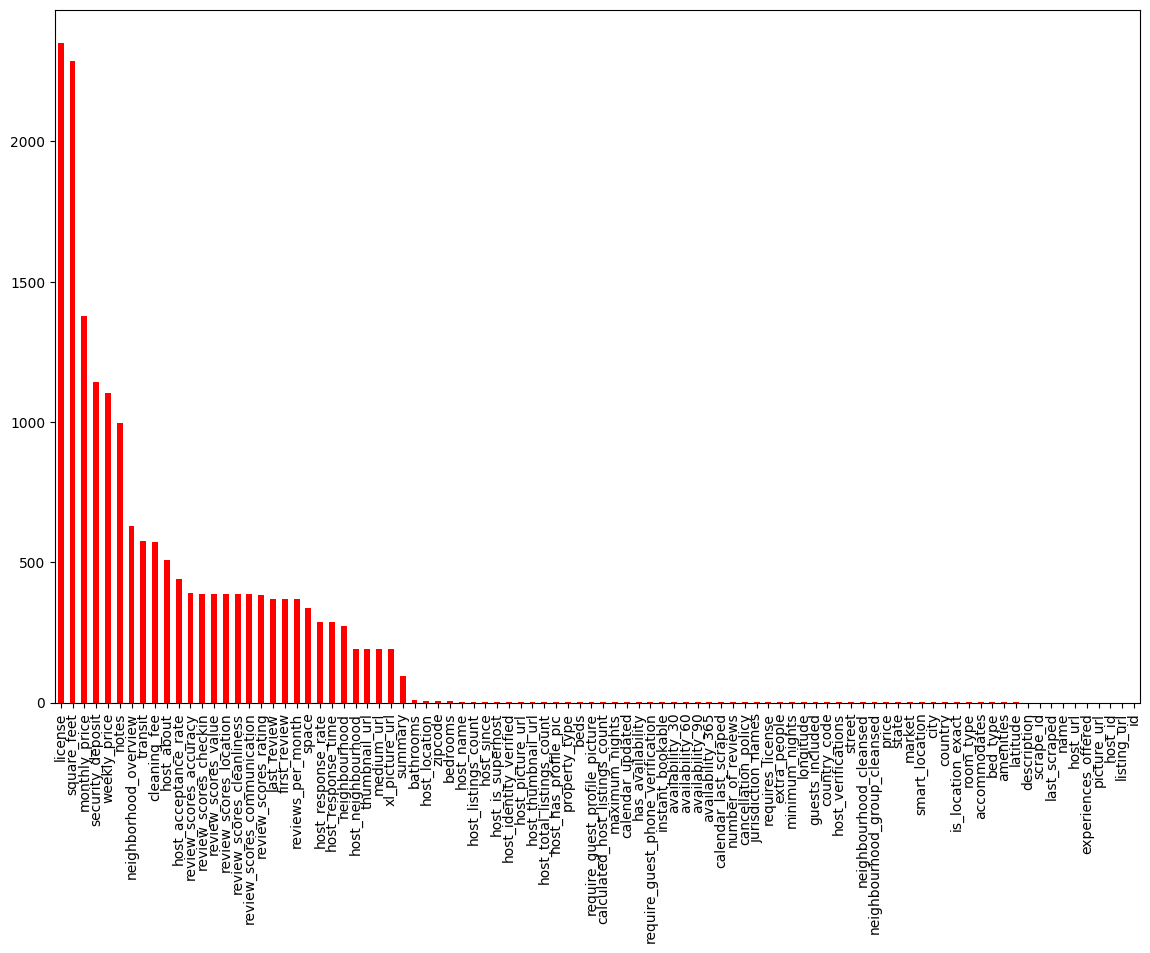

In [8]:
# Checking for null values in a dataset. plotiing of null values
plt.figure(figsize=(14,9))
listings.isna().sum().sort_values(ascending=False).plot(kind='bar', color='red')

<ipython-input-9-717ea0a6e5bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings.corr(),annot=True,fmt=".1f", cmap="crest");


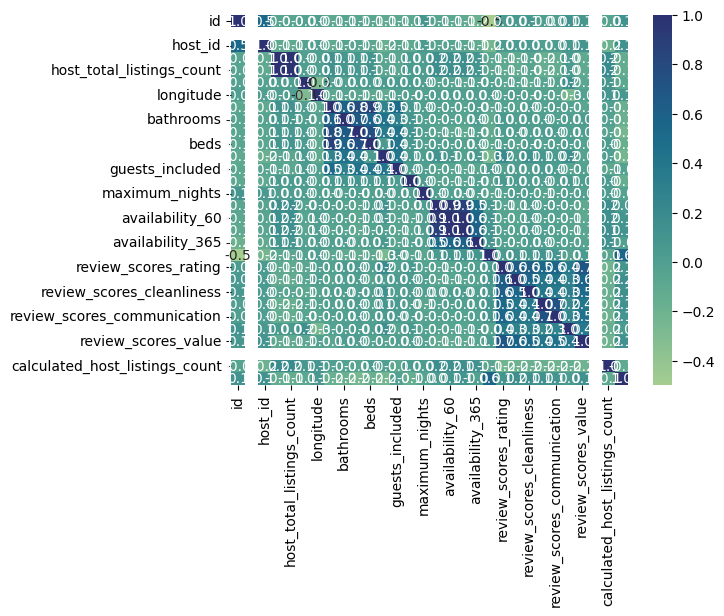

In [9]:
# checking for correlation of columns in the listings dataframe

sns.heatmap(listings.corr(),annot=True,fmt=".1f", cmap="crest");

We are employing the CRISP-DM Approach to solve our first  business question
Does the Cancellation Policy  Influence the rating of an airbnb?


<Axes: xlabel='cancellation_policy'>

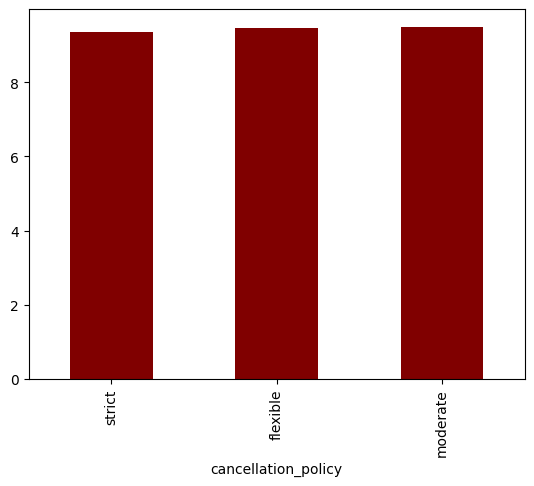

In [10]:
# Filling of na values in the review scores column
listings.fillna(listings['review_scores_value'].mean())
# removing null values in the cancellation_policy series
listings.groupby('cancellation_policy')['review_scores_value'].mean().sort_values().plot(kind='bar', color='maroon')

In [11]:
# Reading in the columns of the dataframe
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Which Neighbourhood is the most popular?

<Axes: >

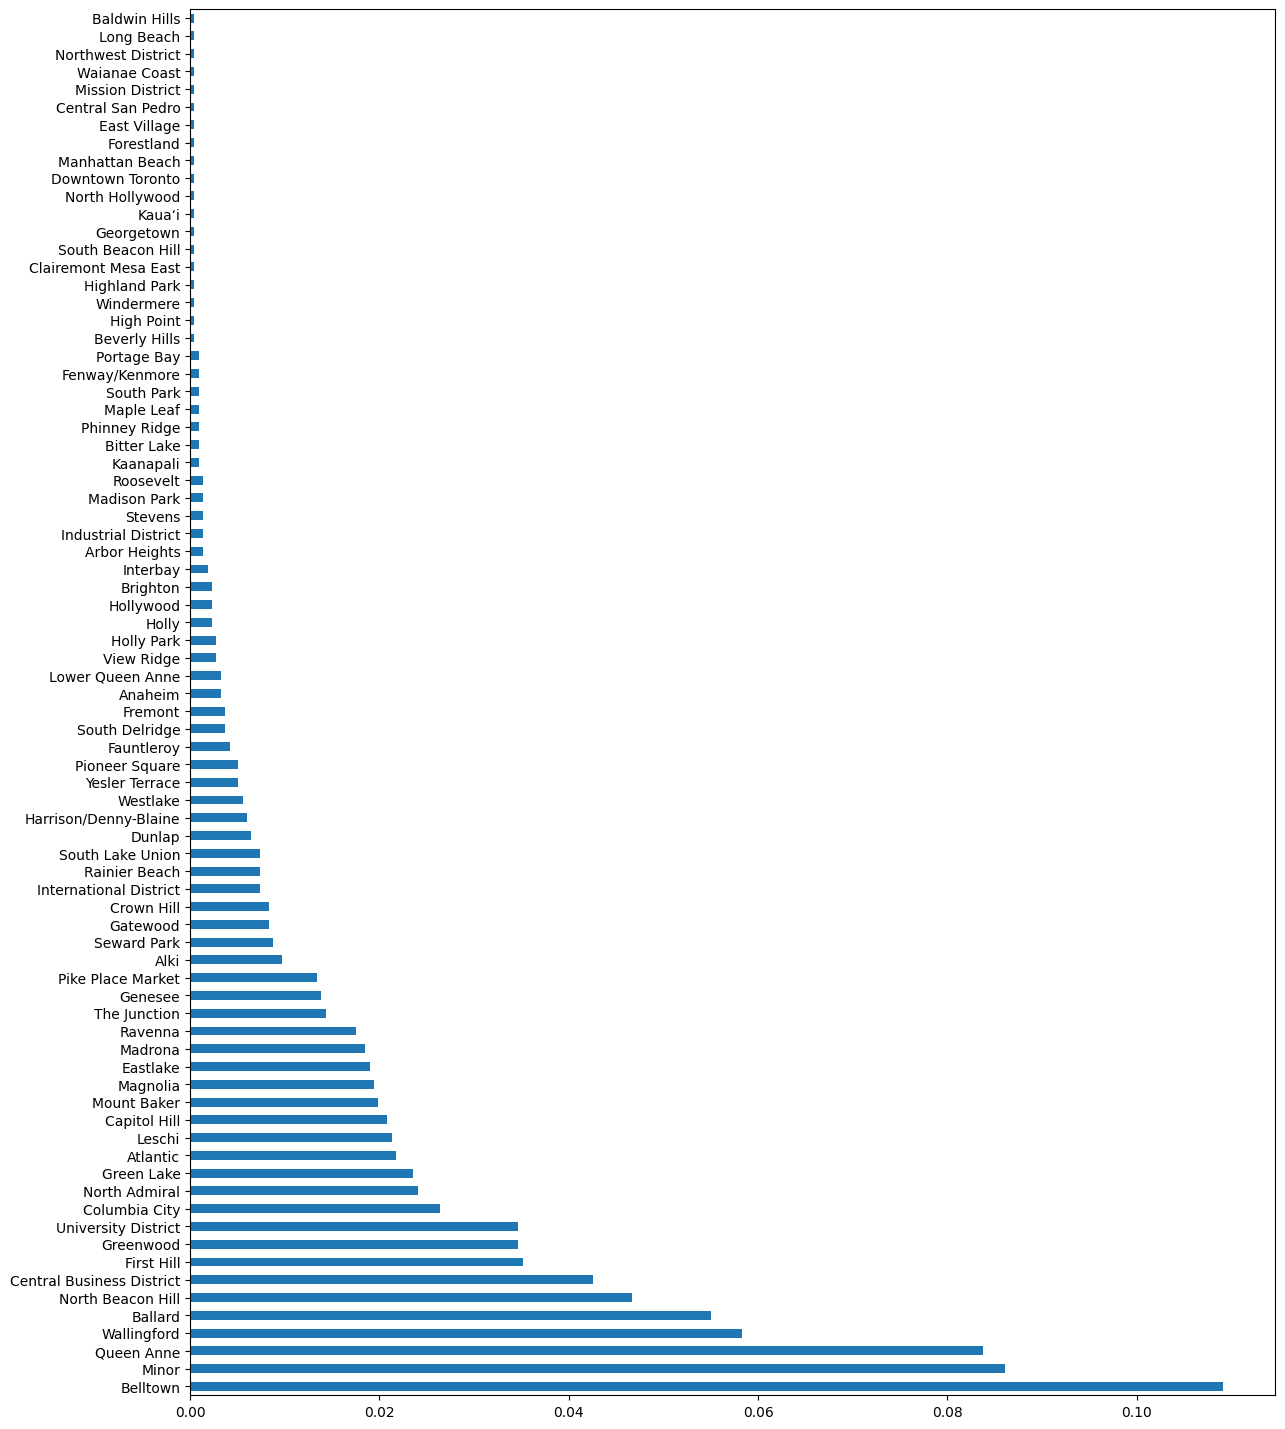

In [26]:
plt.figure(figsize=(14,18))
listings.host_neighbourhood.value_counts(normalize=True).plot(kind='barh')

Question Two:
Whats the average price of an Airbnb per Neighbourhood

In [46]:
# Cleaning of the price column
listings['clean_price'] =  listings.price.replace({'[\$,]':''}, regex=True).astype(float)

# Calculating the average price per neighborhood using pivot tables
plt.figure(figsize=(14,18))
avg_price_neighbourhood= listings.pivot_table(index='host_neighbourhood', values='clean_price', aggfunc='mean').sort_values(by=['clean_price'])
avg_price_neighbourhood.tail(5)



,clean_price
host_neighbourhood,
Industrial District,245.0
Fenway/Kenmore,324.0
Kauaʻi,350.0
Beverly Hills,375.0
Kaanapali,377.5


<Figure size 1400x1800 with 0 Axes>

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['clean_price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['clean_price'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['clean_price', 'count()', None], **{})
chart

In [14]:
# Reading in the columns of the dataframe
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [15]:
# Selecting numeric columns

num_cols =listings.select_dtypes(include=['int','float'])
num_cols.columns
num_cols.shape

(2352, 31)

Predicting of Price from a list of Column Features

Question Three: What is the average price per room Type?


<Axes: xlabel='room_type'>

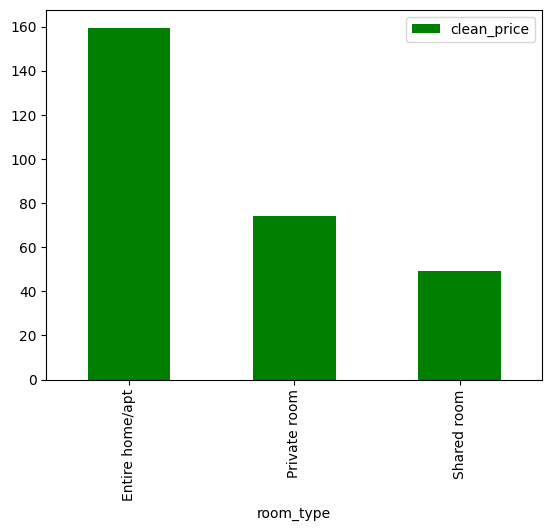

In [74]:
rooms=listings.pivot_table(index='room_type',values='clean_price', aggfunc='mean')
rooms.plot(kind='bar', color='green')


In [75]:
rooms.head()

,clean_price
room_type,
Entire home/apt,159.645664
Private room,74.020498
Shared room,49.261538
